In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
day= pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


distribution of categorical varible

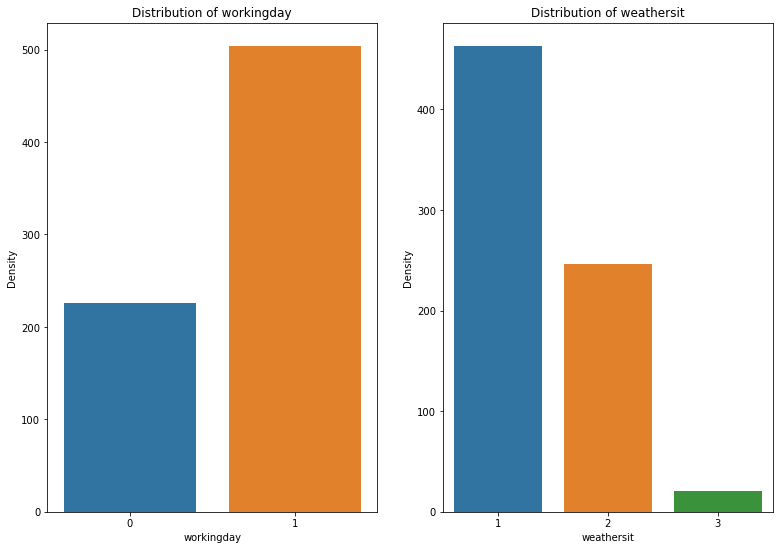

In [5]:
cat_vars = ['workingday','weathersit']
plt.figure(figsize=(13,9))
for i,v in enumerate(cat_vars):
    plt.subplot(1,2,i+1)
    sns.countplot(day[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()    

dropping columns

In [6]:
day.drop(['casual','instant','dteday','registered'], axis=1, inplace=True)

In [7]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#weathersit and season has umerical values converting them into object

In [8]:
day[['season','weathersit']] = day[['season','weathersit']].astype(object)

In [9]:
day.dtypes

season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [10]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# data visualization

pairplot

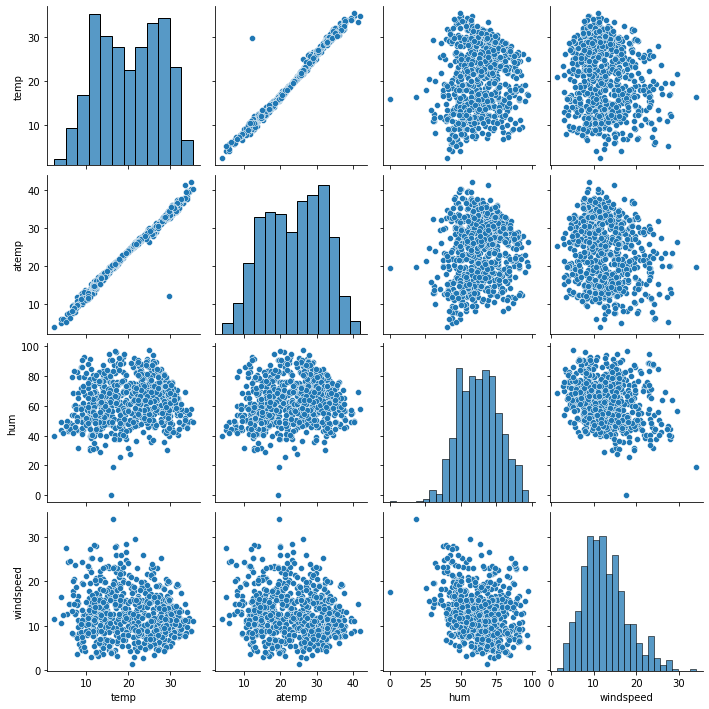

In [11]:
sns.pairplot(day.select_dtypes(include=['int','float']))
plt.show()

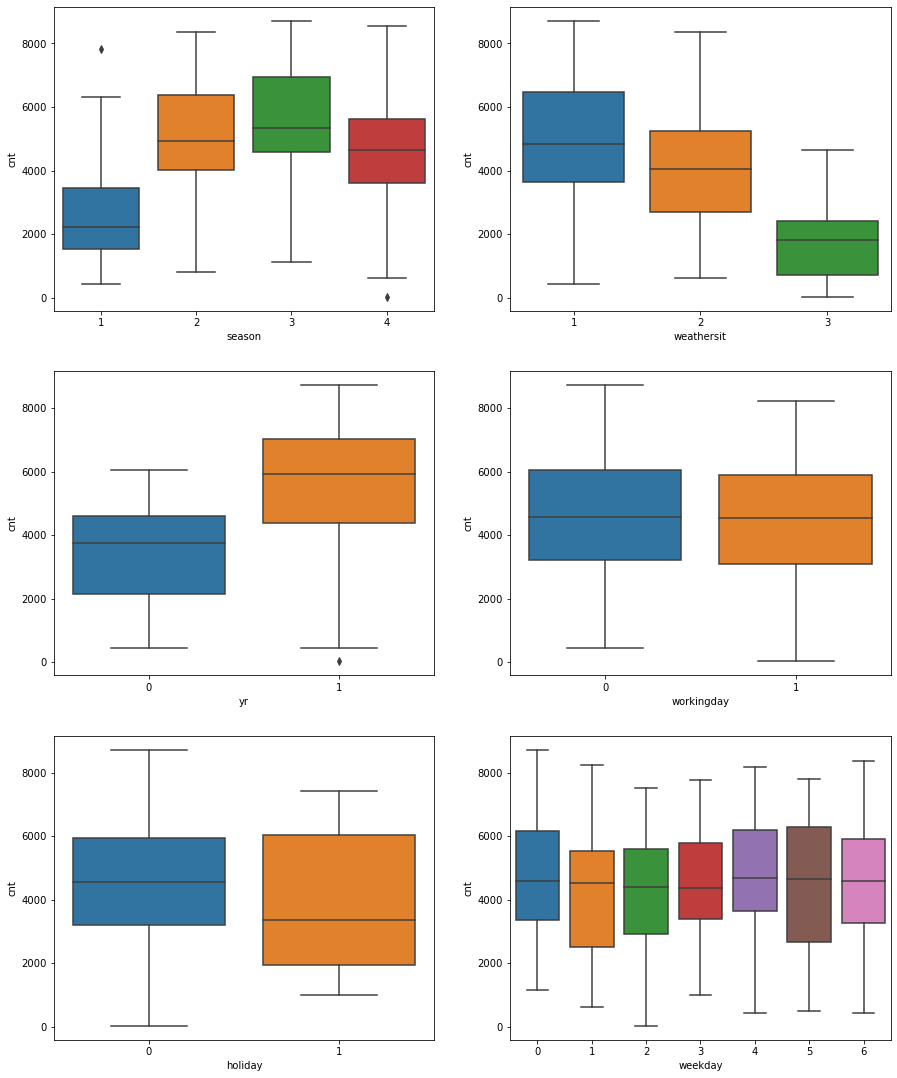

In [12]:
plt.figure(figsize=(15,19))

plt.subplot(3,2,1)
sns.boxplot(x = 'season',y = 'cnt', data= day)

plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit',y = 'cnt' , data= day)

plt.subplot(3,2,3)
sns.boxplot(x ='yr' ,y = 'cnt' , data= day)

plt.subplot(3,2,4)
sns.boxplot(x ='workingday' ,y = 'cnt' , data= day)

plt.subplot(3,2,5)
sns.boxplot(x ='holiday' ,y = 'cnt' , data= day)

plt.subplot(3,2,6)
sns.boxplot(x ='weekday' ,y = 'cnt' , data= day)

plt.show()

above showed is distribution of categorical varible

data prepartion

# dummy varaibles created

In [13]:
day = pd.get_dummies(day, prefix = ['season', 'weathersit'], drop_first=True )


In [14]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


tarining and test splitted

In [15]:
#dataframe created
day_train, day_test = train_test_split(day, train_size= 0.7, random_state=30)
print(day_train.shape)
print(day_test.shape)

(510, 15)
(220, 15)


In [16]:
#using minmaxscaler
scaler = MinMaxScaler()

num_vars = ['temp','atemp','windspeed','hum','cnt','weekday','mnth']

day_train[num_vars]= scaler.fit_transform(day_train[num_vars])

day_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
155,0,0.454545,0,0.333333,1,0.720868,0.690038,0.670951,0.239759,0.561896,1,0,0,1,0
108,0,0.272727,0,0.666667,1,0.534417,0.513618,0.684661,0.279504,0.366084,1,0,0,1,0
493,1,0.363636,0,0.666667,1,0.624917,0.601819,0.765210,0.399983,0.540152,1,0,0,1,0
405,1,0.090909,0,0.000000,0,0.240020,0.242927,0.555270,0.194894,0.438219,0,0,0,1,0
90,0,0.272727,0,0.000000,0,0.265099,0.228951,0.705656,0.487178,0.253682,1,0,0,1,0


In [17]:
#checking shape and size of test and train.
day_train.shape

(510, 15)

data training

correlation checked between varibles

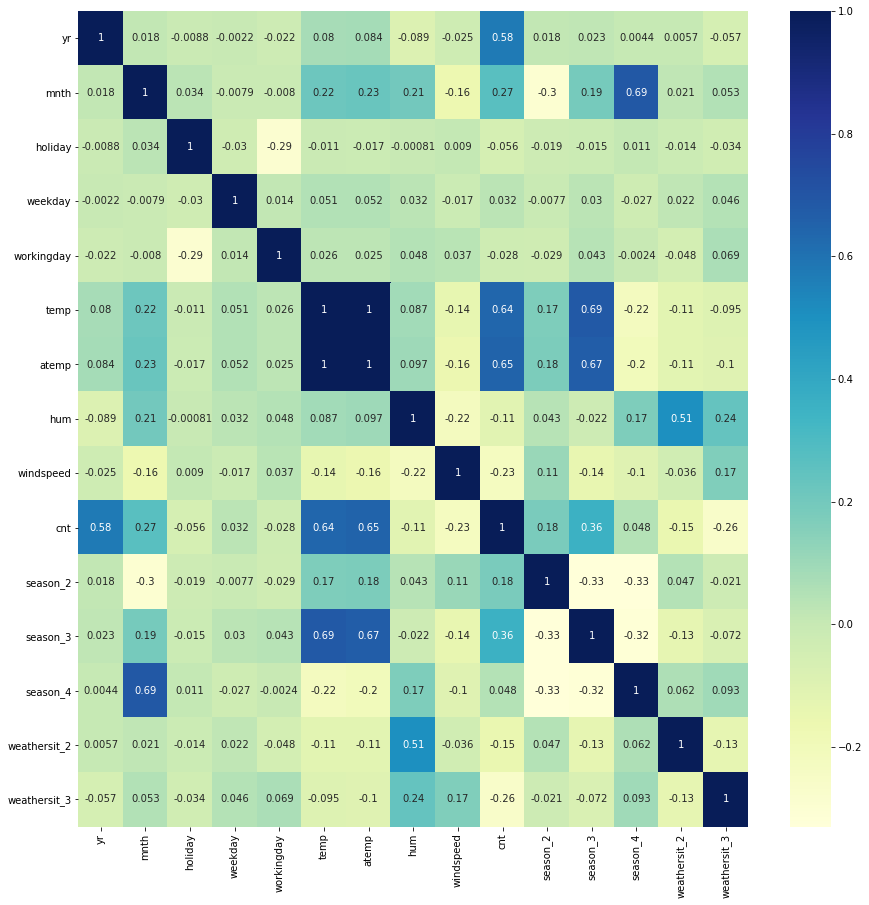

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(day_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [19]:
#dropping columns
#creating variable
X_train = day_train.drop(['cnt','temp'],axis=1)
y_train = day_train['cnt']

In [20]:
print(y_train.shape)
print(X_train.shape)


(510,)
(510, 13)


In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

target varaible prediction

In [22]:
y_train_pred = lm.predict(X_train)

In [23]:
#r2 score checking
r2_score(y_true= y_train, y_pred=y_train_pred)

0.8231509906479645

RFE to reduce dimension data

In [24]:
rfe = RFE(lm, 11)
rfe = rfe.fit(X_train,y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

training data columns

In [26]:
col_train = X_train.columns[rfe.support_]
col_train

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# model building

In [27]:
import statsmodels.api as sm

In [28]:
#training data
X_train_rfe = X_train[col_train]

#adding constat to variable
X_train_sm = sm.add_constant(X_train_rfe)

In [29]:
lm = sm.OLS(y_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     209.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.42e-179
Time:                        16:16:35   Log-Likelihood:                 483.60
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     498   BIC:                            -892.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2563      0.029      8.737      0.000       0.199       0.314
yr               0.2259      0.009     26.492      0.000       0.209       0.243
holiday         -0.0517      0.022     -2.327      0.020      -0.095      -0.008
weekday          0.0162      0.013      1.275      0.203      -0.009       0.041
atemp            0.4545      0.034     13.226      0.000       0.387       0.522
hum             -0.1756      0.039     -4.461      0.000      -0.253      -0.098
windspeed       -0.1586      0.029     -5.473      0.000      -0.216      -0.102
season_2         0.1421      0.016      9.111      0.000       0.111       0.173
season_3         0.0985      0.021      4.772      0.000       0.058       0.139
season_4         0.1663      0.013     12.600      0.000       0.140       0.192
weathersit_2    -0.0373      0.011     -3.329      0.001      -0.059      -0.015
weathersit_3    -0.2104      0.028     -7.412      0.000      -0.266      -0.155
==============================================================================
Omnibus:                       56.461   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.458
Skew:                          -0.595   Prob(JB):                     4.69e-29
Kurtosis:                       5.173   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is less than 0.05

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.95
1,holiday,1.04
2,weekday,3.07
3,atemp,18.94
4,hum,14.69
5,windspeed,4.44
6,season_2,3.47
7,season_3,5.84
8,season_4,2.36
9,weathersit_2,2.18


removing 'hum' variable

In [34]:
X_train_rfe.drop(['hum'], axis=1, inplace=True)

In [35]:
X_train_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_sm)
lm_model = lm.fit()
lm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.92e-176
Time:                        16:20:28   Log-Likelihood:                 473.60
No. Observations:                 510   AIC:                            -925.2
Df Residuals:                     499   BIC:                            -878.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1533      0.018      8.318      0.000       0.117       0.189
yr               0.2309      0.009     26.806      0.000       0.214       0.248
holiday         -0.0547      0.023     -2.415      0.016      -0.099      -0.010
weekday          0.0166      0.013      1.287      0.199      -0.009       0.042
atemp            0.4281      0.034     12.413      0.000       0.360       0.496
windspeed       -0.1221      0.028     -4.310      0.000      -0.178      -0.066
season_2         0.1407      0.016      8.858      0.000       0.110       0.172
season_3         0.1026      0.021      4.884      0.000       0.061       0.144
season_4         0.1595      0.013     11.943      0.000       0.133       0.186
weathersit_2    -0.0669      0.009     -7.284      0.000      -0.085      -0.049
weathersit_3    -0.2632      0.026    -10.017      0.000      -0.315      -0.212
==============================================================================
Omnibus:                       52.060   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.481
Skew:                          -0.567   Prob(JB):                     1.38e-25
Kurtosis:                       5.025   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF checking

In [37]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif


,features,VIF
0,yr,1.95
1,holiday,1.04
2,weekday,2.88
3,atemp,14.19
4,windspeed,3.81
5,season_2,3.45
6,season_3,5.69
7,season_4,2.27
8,weathersit_2,1.52
9,weathersit_3,1.11


season3 varible has been removed

In [ ]:
X_train_rfe.drop(['season_3'], axis=1, inplace=True)

model creation after dropping atemp varible

In [38]:
X_train_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.92e-176
Time:                        16:33:30   Log-Likelihood:                 473.60
No. Observations:                 510   AIC:                            -925.2
Df Residuals:                     499   BIC:                            -878.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1533      0.018      8.318      0.000       0.117       0.189
yr               0.2309      0.009     26.806      0.000       0.214       0.248
holiday         -0.0547      0.023     -2.415      0.016      -0.099      -0.010
weekday          0.0166      0.013      1.287      0.199      -0.009       0.042
atemp            0.4281      0.034     12.413      0.000       0.360       0.496
windspeed       -0.1221      0.028     -4.310      0.000      -0.178      -0.066
season_2         0.1407      0.016      8.858      0.000       0.110       0.172
season_3         0.1026      0.021      4.884      0.000       0.061       0.144
season_4         0.1595      0.013     11.943      0.000       0.133       0.186
weathersit_2    -0.0669      0.009     -7.284      0.000      -0.085      -0.049
weathersit_3    -0.2632      0.026    -10.017      0.000      -0.315      -0.212
==============================================================================
Omnibus:                       52.060   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.481
Skew:                          -0.567   Prob(JB):                     1.38e-25
Kurtosis:                       5.025   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF checking

In [39]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,1.95
1,holiday,1.04
2,weekday,2.88
3,atemp,14.19
4,windspeed,3.81
5,season_2,3.45
6,season_3,5.69
7,season_4,2.27
8,weathersit_2,1.52
9,weathersit_3,1.11


residual analysis

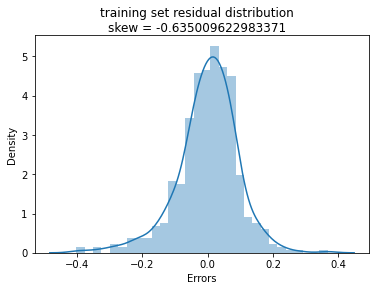

In [40]:
res = y_train - y_train_pred
skew = res.skew()
std_dev = res.std()
sns.distplot(res)
plt.suptitle('training set residual distribution' + '\nskew = '+ str(skew))
plt.xlabel('Errors')
plt.show()

q-q plotting residual against normal distribution

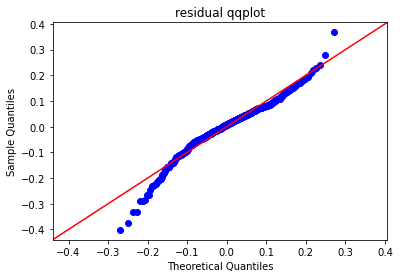

In [41]:
fig = sm.qqplot(res, line='45', loc=0, scale=std_dev)
plt.title('residual qqplot')
plt.savefig('residual_qqplot')
plt.show()

# making predictions

applying scaling

In [44]:
num_vars = ['hum','windspeed','mnth','temp','atemp','windspeed','cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
293,0,0.261533,0,0,0,0.180231,-0.000094,1.704903,2.472255,391.181818,0,0,1,0,0
334,0,0.323072,0,6,0,0.131748,-0.000773,1.546666,2.458431,338.727273,0,0,1,0,0
158,0,0.138455,0,5,1,0.327086,0.001653,1.857817,1.527790,400.000000,1,0,0,0,0
677,1,0.292302,0,6,0,0.152477,-0.000487,1.598525,2.395898,544.636364,0,0,1,0,0
642,1,0.261533,0,6,0,0.259280,0.000806,1.875104,1.187575,741.363636,0,0,1,0,0


In [45]:
day_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000
mean,0.509091,0.163350,0.009091,3.122727,0.709091,0.212566,0.000229,1.862838,2.139671,422.528099,0.250,0.290909,0.254545,0.309091,0.027273
std,0.501057,0.104375,0.095128,1.995070,0.455217,0.076341,0.000933,0.458893,0.893733,175.701874,0.434,0.455217,0.436599,0.463173,0.163248
min,0.000000,-0.015392,0.000000,0.000000,0.000000,0.024929,-0.002076,0.683691,0.520925,64.000000,0.000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076916,0.000000,1.000000,0.000000,0.148108,-0.000523,1.532041,1.486093,296.704545,0.000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.169224,0.000000,3.000000,1.000000,0.223445,0.000445,1.863801,2.060228,408.863636,0.000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.261533,0.000000,5.000000,1.000000,0.277198,0.000982,2.176615,2.599067,564.363636,0.250,1.000000,1.000000,1.000000,0.000000
max,1.000000,0.323072,1.000000,6.000000,1.000000,0.346761,0.002016,2.969451,4.638957,763.090909,1.000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_test = day_test['cnt']
X_test = day_test[X_train_rfe.columns]

In [52]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lm_model.predict(X_test_sm)

plotting of y test and x test pred.

# model evaluation

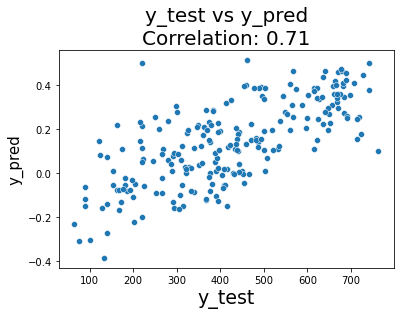

In [54]:

corr = round(np.corrcoef(y_test, y_test_pred)[0][1],2)
sns.scatterplot(x = y_test, y = y_test_pred)
plt.title('y_test vs y_pred' + '\nCorrelation: ' + str(corr), fontsize=20)              
plt.xlabel('y_test', fontsize=19)                          
plt.ylabel('y_pred', fontsize=15)                          
plt.show()

# r-squared score

In [55]:
r2_score_test = r2_score(y_test, y_test_pred)
round(r2_score_test,2)

-5.8

# adjusted R^2 value test

In [ ]:
R2adj.=1−(1−R2)∗n−1n−p−1

In [57]:
X_test.shape

(220, 10)

In [58]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

NameError: name 'r2' is not defined